A partir de los datos de iris:

Ejercicio 1:

- Carga los datos originales
- Utiliza PCA para reducir la dimensionalidad de los datos. No reemplaces X con el resultado, crea una nueva X_pca. Utiliza PCA(2) y otra con PCA(3)
- Utiliza Kmeans para agrupar y predecir las clases de los nuevos datos.
- Compara los resultados para PCA(2) y PCA(3) con las clases originales (y_real).
- ¿Es mejor PCA(2) o PCA(3)?

Ejercicio 2: 

- Repite el proceso con T-SNE y DBSCAN. ¿Cuál da mejores resultados?


In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

## Ejercicio 1 PCA

In [80]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn import metrics
import seaborn as sns

In [26]:
pca2 = PCA(n_components=2)
pca3 =PCA(n_components=3)

In [27]:
pca2.fit(X)

PCA(n_components=2)

In [28]:
pca3.fit(X)

PCA(n_components=3)

In [29]:
X_pca2 = pca2.transform(iris.data)
X_pca3 = pca3.transform(iris.data)

In [66]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_pca2)
predict2 = kmeans.predict(X_pca2)


In [65]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_pca3)
predict3 = kmeans.predict(X_pca3)


In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

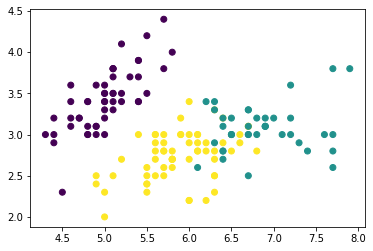

In [45]:
plt.scatter(X[:, 0], X[:, 1], c=predict2)


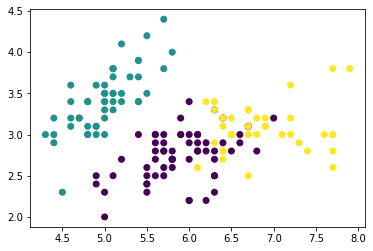

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=predict3)

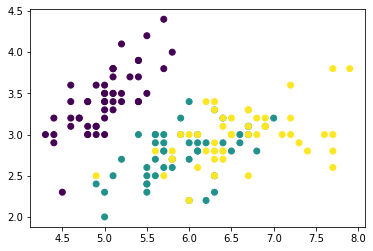

In [47]:
plt.scatter(X[:, 0], X[:, 1], c=iris.target)

### Es mejor pca_3

## Ejercicio 2 T-SNE

In [73]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [72]:
X_embedded2 = TSNE(n_components=2).fit_transform(X)
X_embedded3 = TSNE(n_components=3).fit_transform(X)

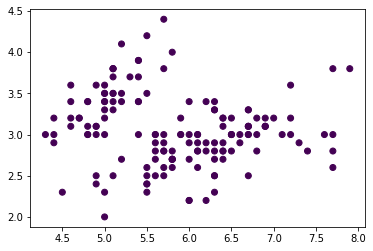

In [90]:
db = DBSCAN(eps=.2)
clusters = db.fit_predict(X_embedded2)
plt.scatter(X[:, 0], X[:, 1], c = clusters);

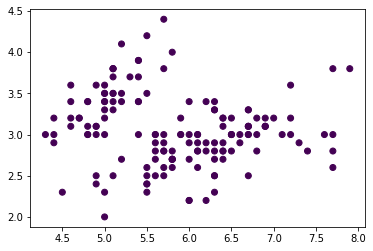

In [94]:
db = DBSCAN(eps=.2)
clusters = db.fit_predict(X_embedded3)
plt.scatter(X[:, 0], X[:, 1], c = clusters)

### En este caso sería mejor realizarlo con 2 dimensiones usando PCA y kmeans, ya que en el segundo ejercicio no diferencia los tipos de cluster

In [ ]:
### No sé si me he equivocado, investigaré mas en el finde